## Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.preprocessing import OneHotEncoder, StandardScaler,PolynomialFeatures
from sklearn.impute import SimpleImputer
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.metrics import r2_score, mean_squared_error

## Dataset

In [2]:
df = pd.read_csv("Position_Salaries.csv")

In [3]:
df.head()

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 3 columns):
Position    10 non-null object
Level       10 non-null int64
Salary      10 non-null int64
dtypes: int64(2), object(1)
memory usage: 368.0+ bytes


In [5]:
display(df.describe())
display(df.describe(include="object"))

,Level,Salary
count,10.00000,10.000000
mean,5.50000,249500.000000
std,3.02765,299373.883668
min,1.00000,45000.000000
25%,3.25000,65000.000000
50%,5.50000,130000.000000
75%,7.75000,275000.000000
max,10.00000,1000000.000000


,Position
count,10
unique,10
top,Junior Consultant
freq,1


## Splitting dataset

In [6]:
X = df.drop(columns=["Position"], axis=1).iloc[:, :-1]
y = df.iloc[:, -1]

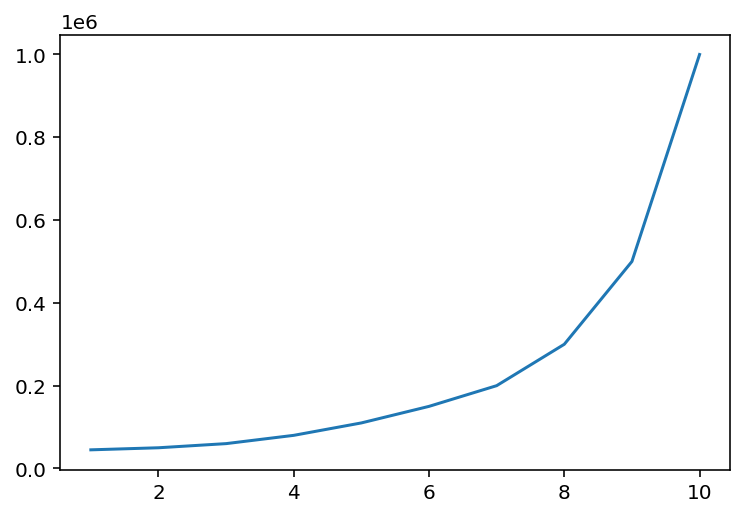

In [7]:
plt.plot(X, y)
plt.show()

## Building Model

In [22]:
pipeline = Pipeline(steps=[
    ("std_scaler", StandardScaler()),
    ("linear_reg", SVR(kernel="rbf", C=3))])

In [23]:
scaler_y = StandardScaler()
y_scaled = scaler_y.fit_transform(y.values.reshape(-1,1))

In [24]:
pipeline.fit(X, y_scaled.reshape(-1,))

Pipeline(memory=None,
         steps=[('std_scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('linear_reg',
                 SVR(C=3, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
                     gamma='auto_deprecated', kernel='rbf', max_iter=-1,
                     shrinking=True, tol=0.001, verbose=False))],
         verbose=False)

In [25]:
y_pred_scaled = pipeline.predict(X)
y_pred = scaler_y.inverse_transform(y_pred_scaled)

## Checking results

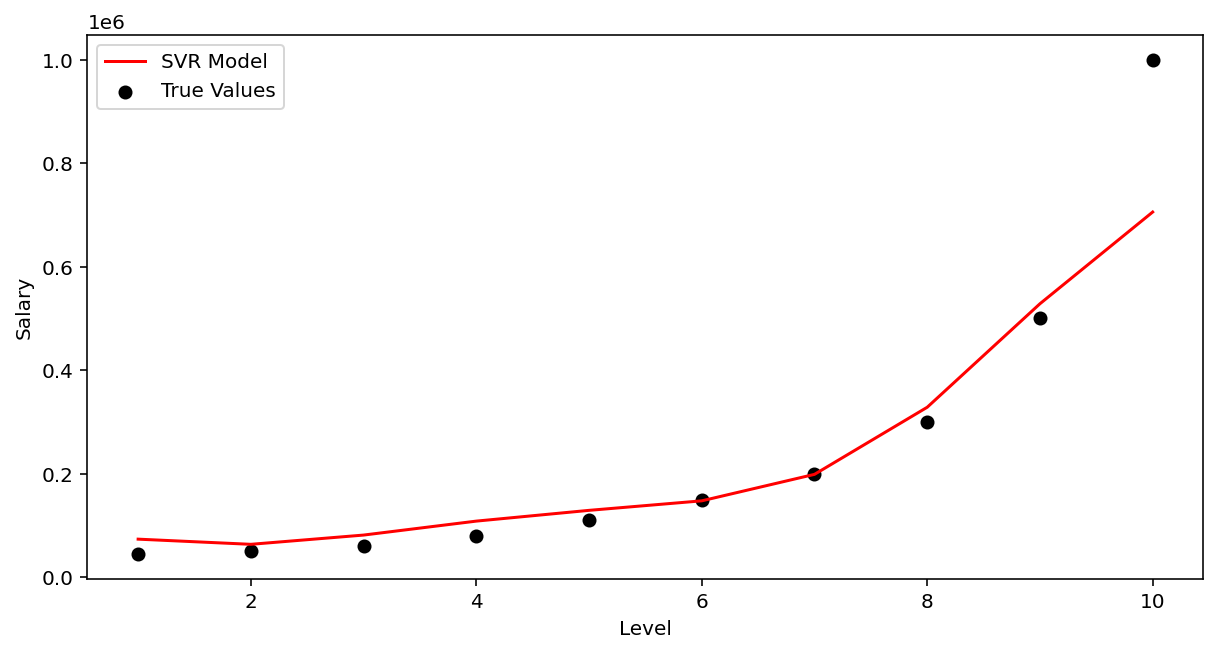

In [26]:
fig, ax = plt.subplots(1,1,figsize=(10,5))
plt.scatter(X, y, color="black", label="True Values")
plt.plot(X, y_pred, color="red", label="SVR Model")
plt.xlabel("Level")
plt.ylabel("Salary")
plt.legend()
plt.show()

In [27]:
print(f"R2 Score: {r2_score(y, y_pred):.3f}")
print(f"RMSE Score: {np.sqrt(mean_squared_error(y, y_pred)):.0f}")

R2 Score: 0.887
RMSE Score: 95336


In [28]:
level = 6.5

pred = scaler_y.inverse_transform(pipeline.predict(np.array([level]).reshape(-1,1)))
print(f">>> Prediction for level {level}: {pred[0]:.2f}")

>>> Prediction for level 6.5: 165775.01
